In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt

# K-Means

Initial clustering of 4 features, elbow plot for k determination, scatter plot of point distribution, clustering img. 

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = "/content/gdrive/My Drive/DataMining/train.csv"
data = pd.read_csv(train)

In [ ]:
# Import and subset starter features
starterFeatures = data[['rsi14','sma9_var', 'sma180_var', 'vwap_var']]
starterFeatures.values # Now np array

array([[ 3.05097608e+01, -6.22295056e-03, -2.26789532e-02,
        -1.75263798e-02],
       [ 4.64527415e+01, -1.06159541e-03, -4.72095039e-03,
        -7.71311385e-03],
       [ 3.43362238e+01, -4.44335091e-03, -1.66481693e-02,
        -1.65887992e-02],
       ...,
       [ 4.15506365e+01, -1.99079526e-03, -1.47744623e-02,
        -3.80272760e-03],
       [ 3.54330613e+01, -5.42660160e-03, -1.26001612e-02,
        -1.57668748e-02],
       [ 3.76485639e+01, -4.00720367e-03, -1.61337123e-02,
        -1.65276248e-02]])

In [ ]:
# Normalize starter features
min_max_scaler = preprocessing.MinMaxScaler()
startersScaled = min_max_scaler.fit_transform(starterFeatures)
subset = pd.DataFrame(startersScaled, columns=['rsi14','sma9_var', 'sma180_var', 'vwap_var'])
print(subset.head())


      rsi14  sma9_var  sma180_var  vwap_var
0  0.371055  0.613722    0.460930  0.549934
1  0.613812  0.843916    0.507860  0.599319
2  0.429319  0.693091    0.476690  0.554652
3  0.463555  0.846391    0.535086  0.616602
4  0.349795  0.848878    0.527060  0.629240


In [ ]:
# Determine est for number of clusters in data
numClusters = [1,2,3,4,5,6,7,8]
sse = []
for k in numClusters:
    test_Kmeans = cluster.KMeans(n_clusters=k)
    test_Kmeans.fit(subset)
    sse.append(test_Kmeans.inertia_)

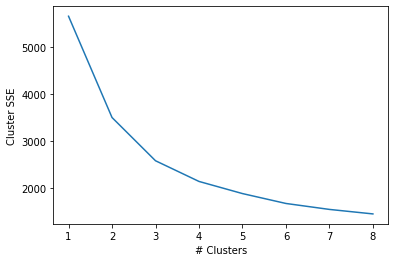

In [ ]:
# Plot elbow plt
plt.plot(numClusters,sse)
plt.xlabel("# Clusters")
plt.ylabel("Cluster SSE")
plt.show()

In [ ]:
# kmeans cluster
kmeans = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
kmeans.fit(subset)
labels = kmeans.labels_
post_clusterDF = pd.DataFrame(labels, index=subset.index, columns=['Cluster ID'])
print(post_clusterDF)


        Cluster ID
0                0
1                2
2                1
3                2
4                1
...            ...
258724           1
258725           2
258726           2
258727           0
258728           2

[258729 rows x 1 columns]


In [ ]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=subset.columns)

,rsi14,sma9_var,sma180_var,vwap_var,CluterLabels
0,0.377598,0.534378,0.435646,0.524962,7.676082e-13
1,0.372352,0.776015,0.483781,0.580394,2.000000e+00
2,0.494010,0.820768,0.505454,0.611609,1.000000e+00


In [ ]:
# Export the dataset with associated cluster labels
print(labels)
subset['CluterLabels'] = labels
# print(subset.head())
subset.to_csv('/content/gdrive/My Drive/DataMining/kMeansSubsets.csv')

[0 2 1 ... 2 0 2]


[[0.37105512 0.61372174 0.46092968 0.54993419]
 [0.6138121  0.84391645 0.5078605  0.59931859]
 [0.42931905 0.69309129 0.47669032 0.55465248]
 ...
 [0.53916983 0.80247445 0.481587   0.61899727]
 [0.44602012 0.64923864 0.48726924 0.55878874]
 [0.47975464 0.71254331 0.47803478 0.55496033]]


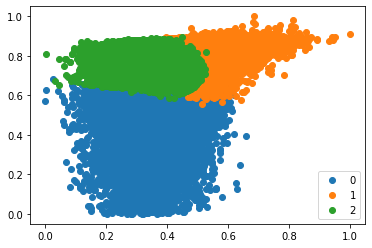

In [ ]:
# Plot clusters with transformed data
print(startersScaled)
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(startersScaled[labels == i , 0] , startersScaled[labels == i , 1] , label = i)
plt.legend()
plt.show()

NameError: ignored

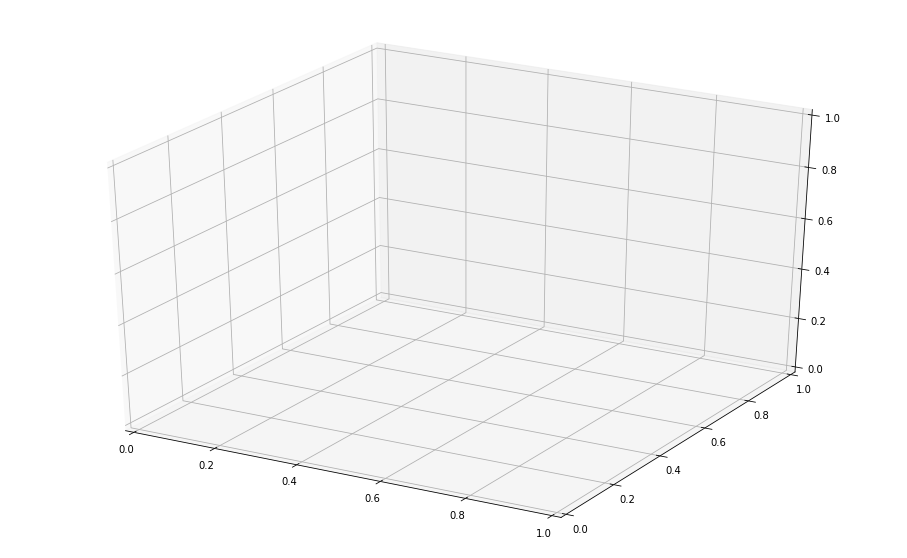

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title("PCA Covid-19 Articles (3D) - Clustered (K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID_3d.png")
plt.show()

# Single-Link

In [ ]:
from scipy.cluster import hierarchy
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import
train = "/content/gdrive/My Drive/DataMining/train.csv"
data = pd.read_csv(train)

In [ ]:
# Import and subset starter features
starterFeatures = data[['rsi14','sma9_var', 'sma180_var', 'vwap_var']]
starterFeatures.values # Now np array

array([[ 3.05097608e+01, -6.22295056e-03, -2.26789532e-02,
        -1.75263798e-02],
       [ 4.64527415e+01, -1.06159541e-03, -4.72095039e-03,
        -7.71311385e-03],
       [ 3.43362238e+01, -4.44335091e-03, -1.66481693e-02,
        -1.65887992e-02],
       ...,
       [ 4.15506365e+01, -1.99079526e-03, -1.47744623e-02,
        -3.80272760e-03],
       [ 3.54330613e+01, -5.42660160e-03, -1.26001612e-02,
        -1.57668748e-02],
       [ 3.76485639e+01, -4.00720367e-03, -1.61337123e-02,
        -1.65276248e-02]])

In [ ]:
# Normalize starter features
min_max_scaler = preprocessing.MinMaxScaler()
startersScaled = min_max_scaler.fit_transform(starterFeatures)
subset = pd.DataFrame(startersScaled, columns=['rsi14','sma9_var', 'sma180_var', 'vwap_var'])
print(subset.head())

      rsi14  sma9_var  sma180_var  vwap_var
0  0.371055  0.613722    0.460930  0.549934
1  0.613812  0.843916    0.507860  0.599319
2  0.429319  0.693091    0.476690  0.554652
3  0.463555  0.846391    0.535086  0.616602
4  0.349795  0.848878    0.527060  0.629240


[[7.00000000e+00 9.00000000e+00 1.71773658e-02 2.00000000e+00]
 [6.00000000e+00 2.90000000e+01 1.74547272e-02 2.00000000e+00]
 [1.20000000e+01 4.50000000e+01 1.74670502e-02 2.00000000e+00]
 [1.00000000e+00 3.20000000e+01 1.80152621e-02 2.00000000e+00]
 [1.40000000e+01 4.80000000e+01 1.87115598e-02 2.00000000e+00]
 [2.80000000e+01 5.30000000e+01 2.11652460e-02 3.00000000e+00]
 [2.00000000e+01 2.60000000e+01 2.27610288e-02 2.00000000e+00]
 [4.00000000e+00 3.30000000e+01 2.30395552e-02 2.00000000e+00]
 [2.20000000e+01 3.80000000e+01 2.32535439e-02 2.00000000e+00]
 [8.00000000e+00 2.10000000e+01 2.45483494e-02 2.00000000e+00]
 [5.10000000e+01 6.00000000e+01 2.57480574e-02 4.00000000e+00]
 [1.80000000e+01 5.70000000e+01 2.63245893e-02 3.00000000e+00]
 [4.40000000e+01 6.10000000e+01 2.94081025e-02 5.00000000e+00]
 [4.60000000e+01 5.90000000e+01 2.94098724e-02 3.00000000e+00]
 [1.50000000e+01 5.80000000e+01 3.00127413e-02 3.00000000e+00]
 [4.70000000e+01 6.30000000e+01 3.22831026e-02 6.000000

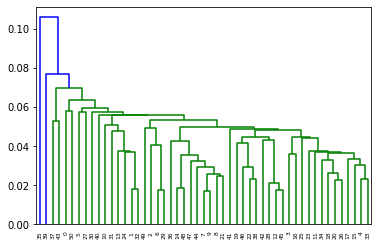

In [ ]:
# Hierarchical single-link clustering
instanceList = subset[0:51].index
singleLink = hierarchy.linkage(subset[0:51].to_numpy(), 'single') # Dataset is too large
# runtime and memory issues if entire dataset is used. Will need to look for solution
# single-link does not seem to be the answer
print(singleLink)
slDN = hierarchy.dendrogram(singleLink,labels=instanceList.tolist())

# K-Means clustering with all features

In [ ]:
train = "/content/gdrive/My Drive/DataMining/train.csv"
data = pd.read_csv(train)
data.head()

,is_profit,sym,datetime,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,prev_ceil_var,prev1_candle_score,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
0,True,MGNX,2020-11-02 11:13:00,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,-0.012658,-0.047328,-0.002925,0.000000,0.000000,103.0,50.0,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802
1,True,MGNX,2020-11-02 13:55:00,46.452741,-0.001062,-0.004721,-0.007713,0.000695,0.280249,-0.031893,-0.007384,-0.042239,0.000000,0.001062,0.000504,265.0,67.0,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148
2,True,AEIS,2020-11-02 14:08:00,34.336224,-0.004443,-0.016648,-0.016589,0.000518,0.284800,0.011396,0.023360,-0.014706,0.000000,-0.001020,0.000000,278.0,13.0,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000
3,False,BERY,2020-11-02 11:20:00,36.584676,-0.001006,0.005697,-0.004279,0.000327,-0.514448,0.017371,0.023517,0.001266,-0.000105,-0.000210,0.000000,110.0,8.0,0.042142,2.599359,0.003596,0.013725,-0.014746,0.003596
4,True,CSGP,2020-11-02 13:19:00,29.113480,-0.000950,0.002626,-0.001767,0.000286,-0.033291,0.019482,0.035230,-0.001628,-0.000375,-0.000012,0.000000,229.0,29.0,0.224383,0.091923,0.008738,0.010651,-0.016754,0.011470


In [ ]:
# Import and subset all features
allFeatures = data.iloc[:, 3:]
allFeatures.head()

,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,prev_ceil_var,prev1_candle_score,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
0,30.509761,-0.006223,-0.022679,-0.017526,0.000620,-0.006472,-0.037037,-0.012658,-0.047328,-0.002925,0.000000,0.000000,103.0,50.0,0.425532,0.758046,-0.032058,-0.005144,-0.034554,0.000802
1,46.452741,-0.001062,-0.004721,-0.007713,0.000695,0.280249,-0.031893,-0.007384,-0.042239,0.000000,0.001062,0.000504,265.0,67.0,0.633584,10.958588,-0.026887,-0.005144,-0.029397,0.006148
2,34.336224,-0.004443,-0.016648,-0.016589,0.000518,0.284800,0.011396,0.023360,-0.014706,0.000000,-0.001020,0.000000,278.0,13.0,0.306356,2.964667,-0.003935,0.015391,-0.030638,0.000000
3,36.584676,-0.001006,0.005697,-0.004279,0.000327,-0.514448,0.017371,0.023517,0.001266,-0.000105,-0.000210,0.000000,110.0,8.0,0.042142,2.599359,0.003596,0.013725,-0.014746,0.003596
4,29.113480,-0.000950,0.002626,-0.001767,0.000286,-0.033291,0.019482,0.035230,-0.001628,-0.000375,-0.000012,0.000000,229.0,29.0,0.224383,0.091923,0.008738,0.010651,-0.016754,0.011470


In [ ]:
# Scaling
min_max_scaler = preprocessing.MinMaxScaler()
allScaled = min_max_scaler.fit_transform(allFeatures)


In [ ]:
allFeatures = pd.DataFrame(allScaled, columns=data.columns[3:])
data.columns[3:]

Index(['rsi14', 'sma9_var', 'sma180_var', 'vwap_var', 'spread14_e',
       'volume14_34_var', 'prev_close_var', 'prev_floor_var', 'prev_ceil_var',
       'prev1_candle_score', 'prev2_candle_score', 'prev3_candle_score',
       'mins_from_start', 'valley_interval_mins', 'valley_close_score',
       'valley_rsi_score', 'day_open_var', 'open_from_prev_close_var',
       'ceil_var', 'floor_var'],
      dtype='object')

In [ ]:
# Determine est for number of clusters in data
numClusters = [1,2,3,4,5,6,7,8]
sse = []
for k in numClusters:
    test_Kmeans = cluster.KMeans(n_clusters=k)
    test_Kmeans.fit(allFeatures)
    sse.append(test_Kmeans.inertia_)
  


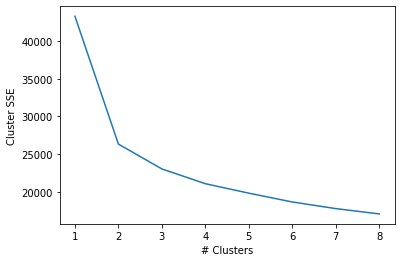

In [ ]:
# Plot elbow plt
plt.plot(numClusters,sse)
plt.xlabel("# Clusters")
plt.ylabel("Cluster SSE")
plt.show()

In [ ]:
# kmeans cluster
kmeans = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
kmeans.fit(allFeatures)
labels = kmeans.labels_
post_clusterAllDF = pd.DataFrame(labels, index=allFeatures.index, columns=['Cluster ID'])
print(post_clusterAllDF)

        Cluster ID
0                0
1                1
2                1
3                0
4                1
...            ...
258724           0
258725           1
258726           1
258727           0
258728           1

[258729 rows x 1 columns]


In [ ]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=allFeatures.columns)

,rsi14,sma9_var,sma180_var,vwap_var,spread14_e,volume14_34_var,prev_close_var,prev_floor_var,prev_ceil_var,prev1_candle_score,prev2_candle_score,prev3_candle_score,mins_from_start,valley_interval_mins,valley_close_score,valley_rsi_score,day_open_var,open_from_prev_close_var,ceil_var,floor_var
0,0.424433,0.740460,0.479032,0.582761,0.094293,0.372920,0.521343,0.490028,0.531065,0.483823,0.502705,0.492755,0.251348,0.065530,0.031361,0.099231,0.473886,0.496762,0.874788,0.012727
1,0.441074,0.804375,0.499600,0.597015,0.052064,0.414343,0.534170,0.501582,0.544691,0.491362,0.507980,0.496765,0.751294,0.091611,0.020020,0.097183,0.494333,0.501128,0.879330,0.045872


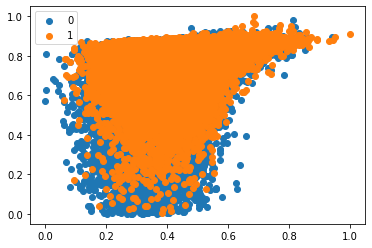

In [ ]:
# Plot clusters with transformed data
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(allScaled[labels == i , 0] , allScaled[labels == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
allFeatures['CluterLabels'] = labels
allFeatures.to_csv('/content/gdrive/My Drive/DataMining/kMeansAllFeatures.csv')
print(allFeatures.head())

      rsi14  sma9_var  sma180_var  ...  ceil_var  floor_var  CluterLabels
0  0.371055  0.613722    0.460930  ...  0.827595   0.004030             0
1  0.613812  0.843916    0.507860  ...  0.853494   0.030899             1
2  0.429319  0.693091    0.476690  ...  0.847258   0.000000             1
3  0.463555  0.846391    0.535086  ...  0.927069   0.018075             0
4  0.349795  0.848878    0.527060  ...  0.916983   0.057646             1

[5 rows x 21 columns]
